In [7]:
from google.colab import files
uploaded = files.upload()

Saving non_Dolphin.wav to non_Dolphin.wav


In [26]:
!ls /content/

Baph.wav  non_Dolphin.wav  sample_data


In [30]:
!ls /content/

Baph_MFCCs_1.csv  Baph.wav  non_Dolphin.wav  sample_data


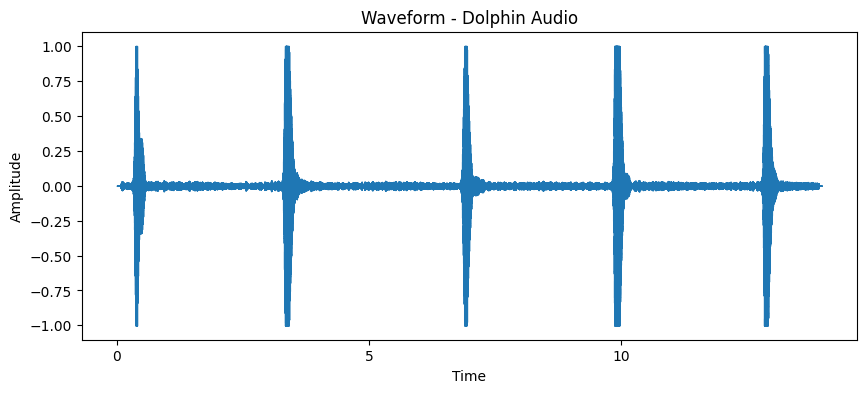

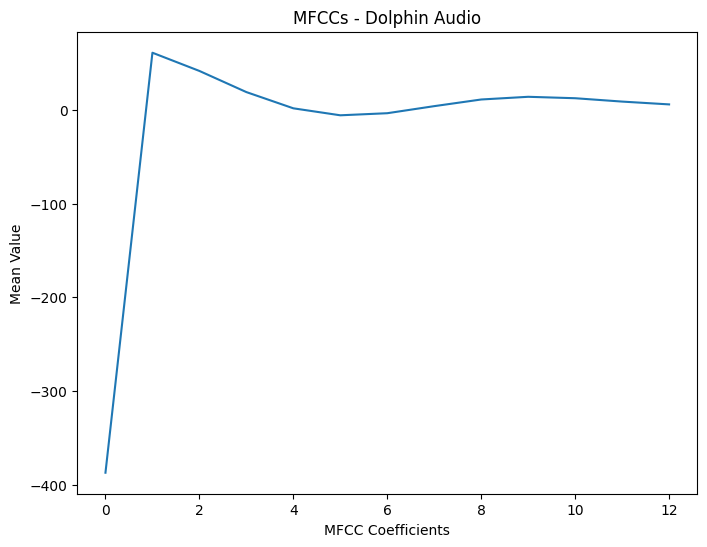

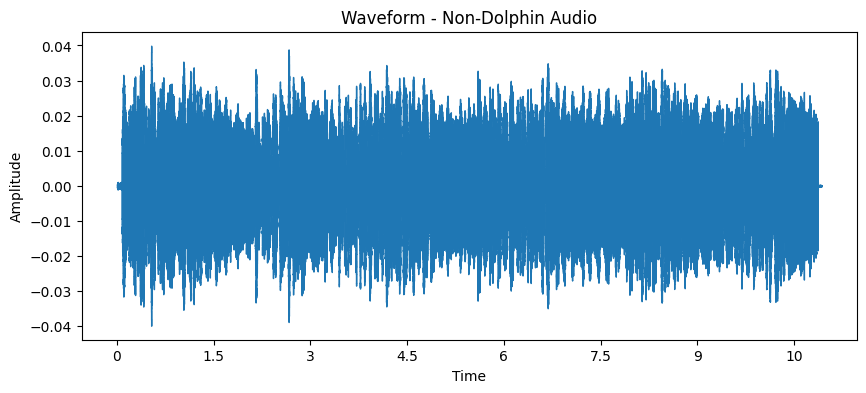

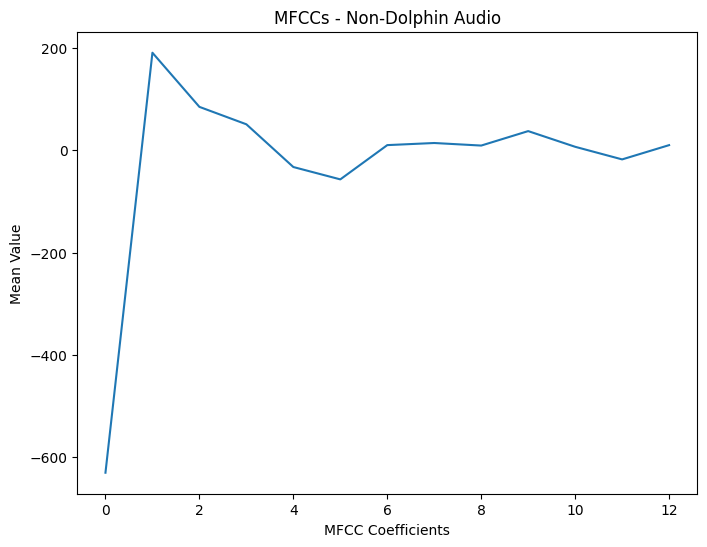

Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [1 0]]


In [29]:
import os
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Function to extract MFCCs from an audio file
def extract_mfccs(file_path):
    waveform, sample_rate = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13)
    return np.mean(mfccs, axis=1)

# Audio file paths for dolphin and non-dolphin sounds (replace these with your audio files)
dolphin_audio = 'Baph.wav'
non_dolphin_audio = 'non_Dolphin.wav'

# Create a list to store the extracted MFCCs and their corresponding labels
data = []
labels = []

# Extract MFCCs from the dolphin audio and label as 'dolphin'
mfccs_dolphin = extract_mfccs(dolphin_audio)
data.append(mfccs_dolphin)
labels.append('dolphin')

# Extract MFCCs from the non-dolphin audio and label as 'non-dolphin'
mfccs_non_dolphin = extract_mfccs(non_dolphin_audio)
data.append(mfccs_non_dolphin)
labels.append('non-dolphin')

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=[f'MFCC_{i+1}' for i in range(mfccs_dolphin.shape[0])])
df['Label'] = labels

# Save the DataFrame to a CSV file (replace 'path_to_dataset.csv' with your desired file path)
df.to_csv('/content/Baph_MFCCs_1.csv', index=False)

# Visualize the waveform and MFCCs for dolphin audio
plt.figure(figsize=(10, 4))
waveform, sample_rate = librosa.load(dolphin_audio)
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Waveform - Dolphin Audio')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(mfccs_dolphin)
plt.title('MFCCs - Dolphin Audio')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.show()

# Visualize the waveform and MFCCs for non-dolphin audio
plt.figure(figsize=(10, 4))
waveform, sample_rate = librosa.load(non_dolphin_audio)
librosa.display.waveshow(waveform, sr=sample_rate)
plt.title('Waveform - Non-Dolphin Audio')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(mfccs_non_dolphin)
plt.title('MFCCs - Non-Dolphin Audio')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.show()

# Load the dataset containing dolphin and non-dolphin audio features
df = pd.read_csv('/content/Baph_MFCCs_1.csv')

# Split features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Convert class labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and print the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)


In [12]:
!ls /content/

Baph_MFCCs.csv	Baph.wav  non_Dolphin.wav  sample_data


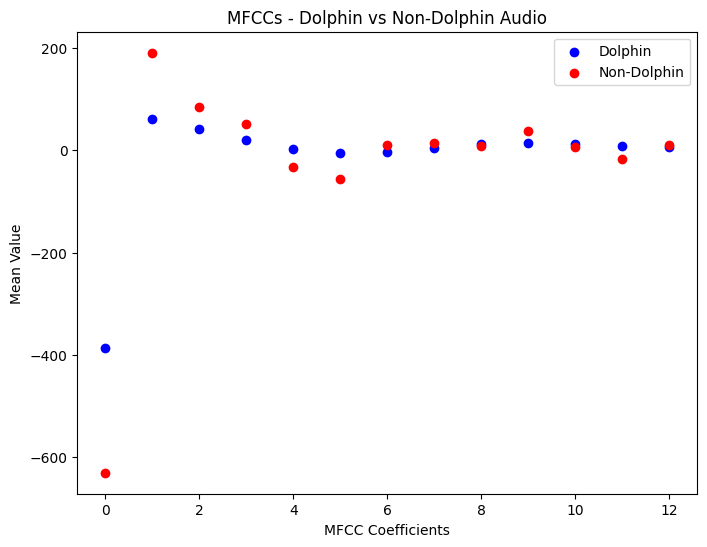

Accuracy: 0.0
Confusion Matrix:
[[0 0]
 [1 0]]


In [31]:


# Function to extract MFCCs from an audio file
def extract_mfccs(file_path):
    waveform, sample_rate = librosa.load(file_path)
    mfccs = librosa.feature.mfcc(y=waveform, sr=sample_rate, n_mfcc=13)
    return np.mean(mfccs, axis=1)

# Audio file paths for dolphin and non-dolphin sounds (replace these with your audio files)
dolphin_audio = 'Baph.wav'
non_dolphin_audio = 'non_Dolphin.wav'

# Create a list to store the extracted MFCCs and their corresponding labels
data = []
labels = []

# Extract MFCCs from the dolphin audio and label as 'dolphin'
mfccs_dolphin = extract_mfccs(dolphin_audio)
data.append(mfccs_dolphin)
labels.append('dolphin')

# Extract MFCCs from the non-dolphin audio and label as 'non-dolphin'
mfccs_non_dolphin = extract_mfccs(non_dolphin_audio)
data.append(mfccs_non_dolphin)
labels.append('non-dolphin')

# Create a DataFrame from the extracted data
df = pd.DataFrame(data, columns=[f'MFCC_{i+1}' for i in range(mfccs_dolphin.shape[0])])
df['Label'] = labels

# Save the DataFrame to a CSV file (replace 'path_to_dataset.csv' with your desired file path)
df.to_csv('/content/Baph_MFCCs_2.csv', index=False)

# Visualize the MFCCs for both dolphin and non-dolphin audio
plt.figure(figsize=(8, 6))
plt.scatter(range(len(mfccs_dolphin)), mfccs_dolphin, c='blue', label='Dolphin')
plt.scatter(range(len(mfccs_non_dolphin)), mfccs_non_dolphin, c='red', label='Non-Dolphin')
plt.title('MFCCs - Dolphin vs Non-Dolphin Audio')
plt.xlabel('MFCC Coefficients')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

# Load the dataset containing dolphin and non-dolphin audio features
df = pd.read_csv('/content/Baph_MFCCs_2.csv')

# Split features and labels
X = df.drop('Label', axis=1)
y = df['Label']

# Convert class labels to integers using LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the dataset into training and testing sets (70% for training, 30% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and print the confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
